<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Explore</b>

In [ ]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
df = pd.read_csv('mill.csv')
# df = pd.read_csv('ai4i2020.csv')

Drop index and IroductId

In [ ]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type
0    1     M14860    M                298.1                    308.6                    1551         42.8                0       0   No Failure
1    2     L47181    L                298.2                    308.7                    1408         46.3                3       0   No Failure
2    3     L47182    L                298.1                    308.5                    1498         49.4                5       0   No Failure
3    4     L47183    L                298.2                    308.6                    1433         39.5                7       0   No Failure
4    5     L47184    L                298.2                    308.7                    1408         40.0                9       0   No Failure

There are no apparent missing values, but we'll check these out carefully to make sure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe(include='all').T

count unique         top  freq       mean         std     min      25%     50%      75%      max
UDI                      10000.0    NaN         NaN   NaN     5000.5  2886.89568     1.0  2500.75  5000.5  7500.25  10000.0
Product ID                 10000  10000      M14860     1        NaN         NaN     NaN      NaN     NaN      NaN      NaN
Type                       10000      3           L  6000        NaN         NaN     NaN      NaN     NaN      NaN      NaN
Air temperature [K]      10000.0    NaN         NaN   NaN  300.00493    2.000259   295.3    298.3   300.1    301.5    304.5
Process temperature [K]  10000.0    NaN         NaN   NaN  310.00556    1.483734   305.7    308.8   310.1    311.1    313.8
Rotational speed [rpm]   10000.0    NaN         NaN   NaN  1538.7761  179.284096  1168.0   1423.0  1503.0   1612.0   2886.0
Torque [Nm]              10000.0    NaN         NaN   NaN   39.98691    9.968934     3.8     33.2    40.1     46.8     76.6
Tool wear [min]          10000.0    NaN         NaN   NaN    107.951   63.654147     0.0     53.0   108.0    162.0    253.0
Target                   10000.0    NaN         NaN   NaN     0.0339    0.180981     0.0      0.0     0.0      0.0      1.0
Failure Type               10000      6  No Failure  9652        NaN         NaN     NaN      NaN     NaN      NaN      NaN

making sure that there are no missing values hidden as a question mark

In [ ]:
df.replace("?",np.nan,inplace=True)

turn all columns into float to make processing later easier

In [ ]:
for column in df.columns:
    try:
        df[column]=df[column].astype(float)
    except:
        pass

just check the descriptions for the numeric features. None missing and on apparent outliers

In [ ]:
# show the numeric characters
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

count        mean          std     min      25%     50%      75%      max
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75  5000.5  7500.25  10000.0
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   300.1   301.50    304.5
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   310.1   311.10    313.8
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00  1503.0  1612.00   2886.0
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20    40.1    46.80     76.6
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   108.0   162.00    253.0
Target                   10000.0     0.03390     0.180981     0.0     0.00     0.0     0.00      1.0

Another verification whether there are any missing features. I see none.

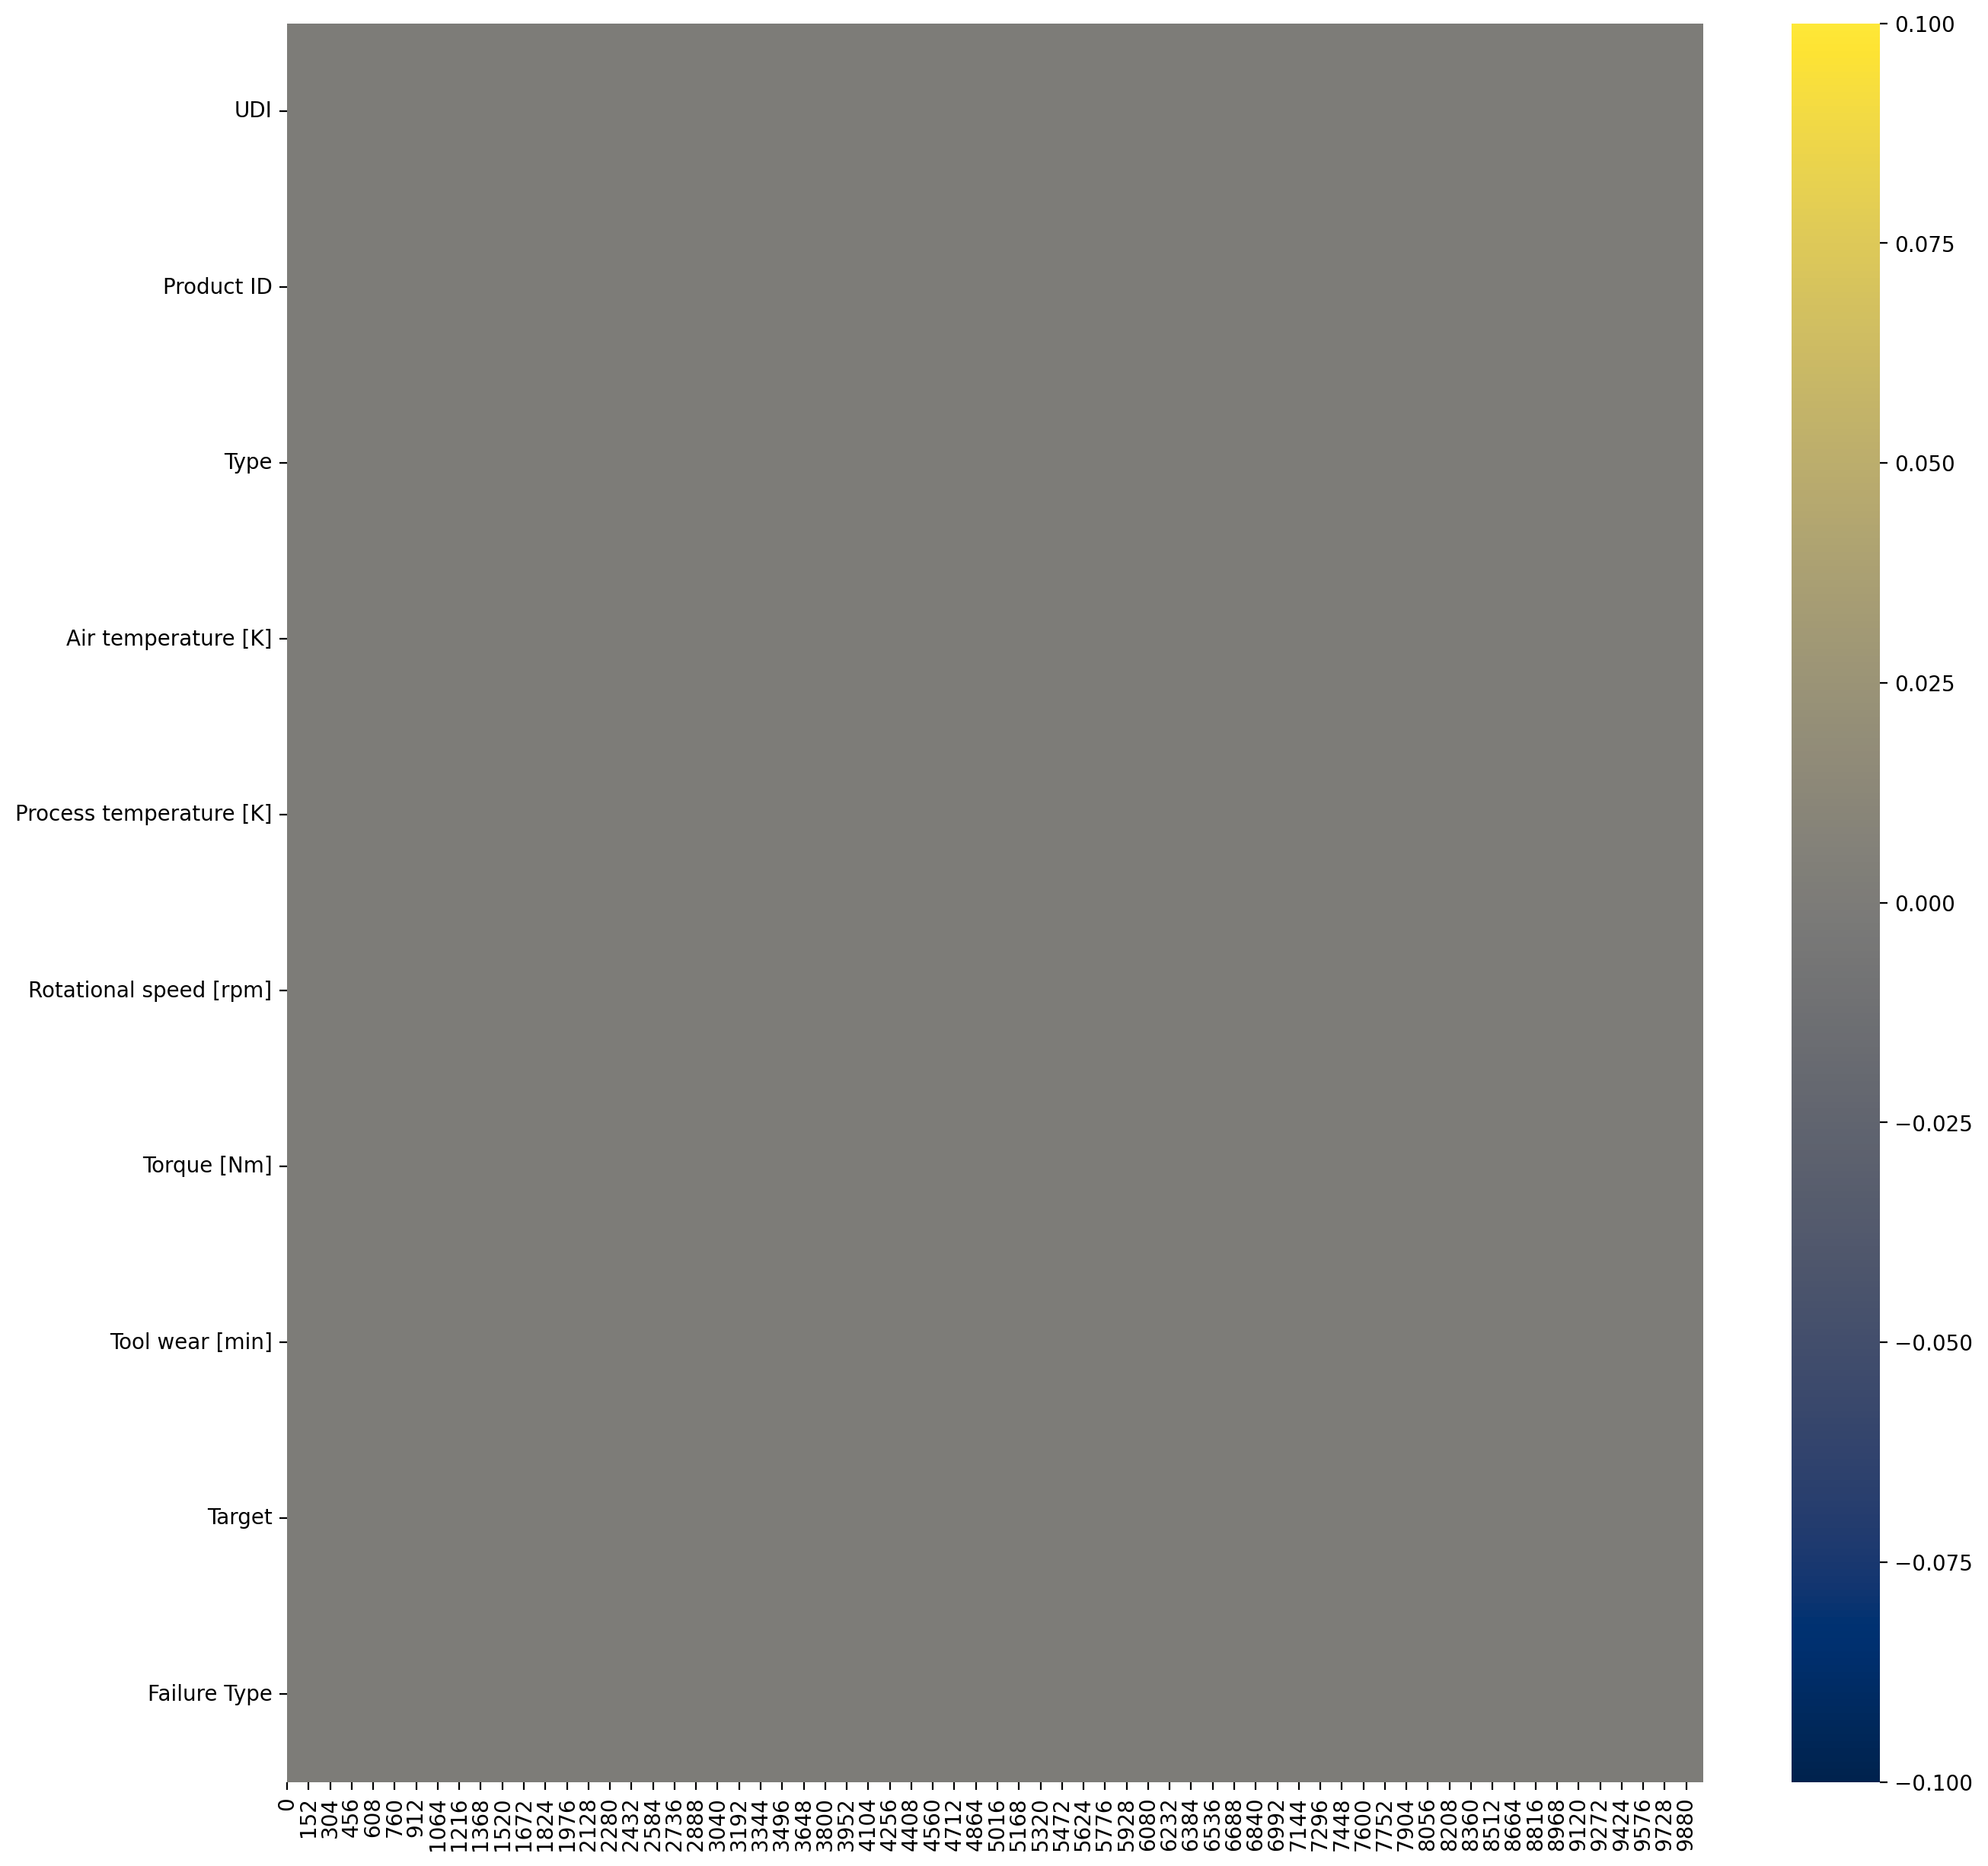

In [ ]:
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

There are strongly correlated features namely process and air temperature. Torque and rotational speed are also strongly correlated. We can drop one of the temperatures, but the torque to rotational speed difference might be a indication of a failure, so we'll keep both.  

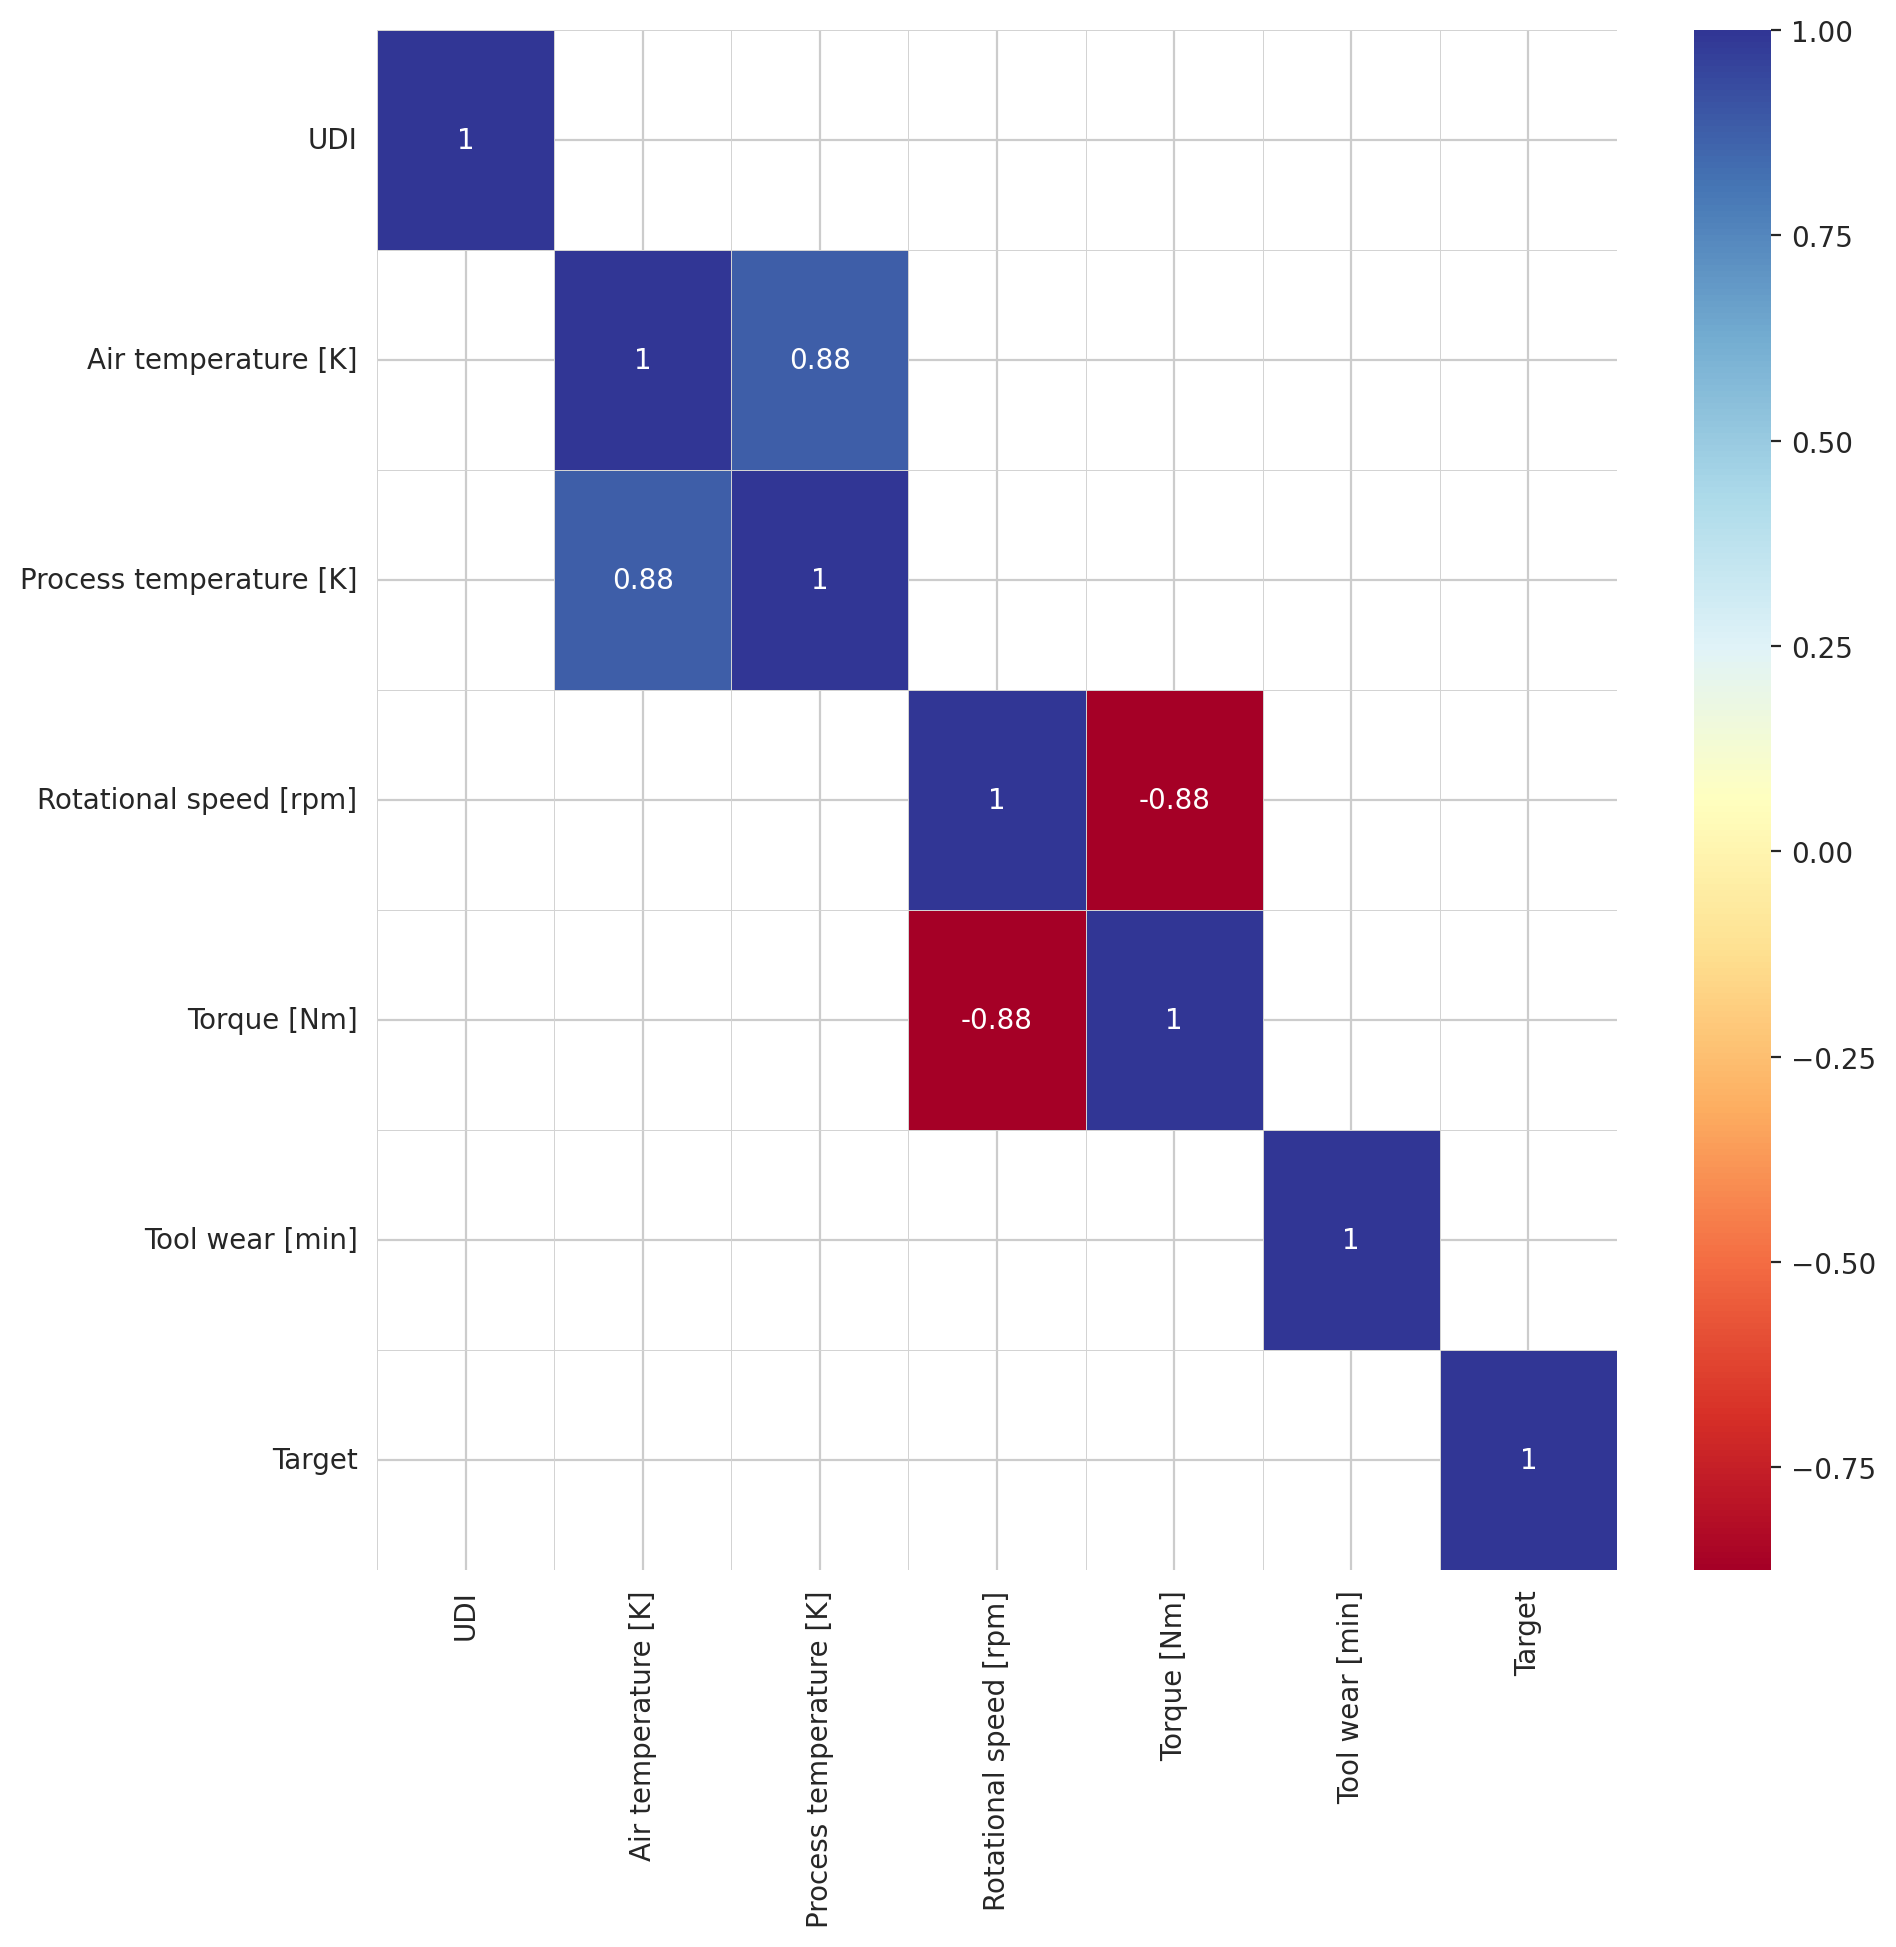

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
!pip install pandas-profiling

import pandas as pd
from pandas_profiling import ProfileReport

# Your code using the pandas-profiling module


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=e2769d0a088a19ebeba71ce2adbfd4d37c3d31367afbd7

The profiling report follows to look for outliers, missing values, and distributions. We can see that the data is imbalanced.

In [ ]:
%%time
profile = ProfileReport(df,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Carl Kirstein",
                                 "copyright_holder": "Carl Kirstein",
                                 "copyright_year": "2022",
                                },
                        explorative=True,
                       )
profile

CPU times: user 18.7 ms, sys: 735 µs, total: 19.5 ms
Wall time: 20.7 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Drop the indices as these have no predictive power

In [ ]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

Drop the failure modes, as we're only interested whether something is a failure. I guess that you'll build a model for each failure mode if it comes down to that.

In [ ]:
df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

KeyError: ignored

Drop the type, as this dominates too strongly on type = L.

In [ ]:
df.drop(['Type'],axis=1,inplace=True)

The remaining features

In [ ]:
list(df)

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

turn categorical information into numeric

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
features = list(df.columns)

In [ ]:
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

Air temperature [K] - 0
Process temperature [K] - 0
Rotational speed [rpm] - 0
Torque [Nm] - 0
Tool wear [min] - 0
Target - 0
Type_L - 0
Type_M - 0
Failure Type_No Failure - 0
Failure Type_Overstrain Failure - 0
Failure Type_Power Failure - 0
Failure Type_Random Failures - 0
Failure Type_Tool Wear Failure - 0


In [ ]:
df_group = df.groupby(['Machine failure'])
df_group.count()

KeyError: ignored

In [ ]:
df[df['Machine failure'].isna()]

KeyError: ignored

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

replace the missing numeric values with the mean

In [ ]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df[feature].fillna(df[feature].mean(),inplace=True)
    except:
        try:
            df[feature].fillna(df[feature].mode(),inplace=True)
        except:
            pass

In [ ]:
df.describe(include='all').T

count        mean         std     min     25%     50%     75%     max
Air temperature [K]              10000.0   300.00493    2.000259   295.3   298.3   300.1   301.5   304.5
Process temperature [K]          10000.0   310.00556    1.483734   305.7   308.8   310.1   311.1   313.8
Rotational speed [rpm]           10000.0  1538.77610  179.284096  1168.0  1423.0  1503.0  1612.0  2886.0
Torque [Nm]                      10000.0    39.98691    9.968934     3.8    33.2    40.1    46.8    76.6
Tool wear [min]                  10000.0   107.95100   63.654147     0.0    53.0   108.0   162.0   253.0
Target                           10000.0     0.03390    0.180981     0.0     0.0     0.0     0.0     1.0
Type_L                           10000.0     0.60000    0.489922     0.0     0.0     1.0     1.0     1.0
Type_M                           10000.0     0.29970    0.458149     0.0     0.0     0.0     1.0     1.0
Failure Type_No Failure          10000.0     0.96520    0.183282     0.0     1.0     1.0     1.0     1.0
Failure Type_Overstrain Failure  10000.0     0.00780    0.087977     0.0     0.0     0.0     0.0     1.0
Failure Type_Power Failure       10000.0     0.00950    0.097009     0.0     0.0     0.0     0.0     1.0
Failure Type_Random Failures     10000.0     0.00180    0.042390     0.0     0.0     0.0     0.0     1.0
Failure Type_Tool Wear Failure   10000.0     0.00450    0.066934     0.0     0.0     0.0     0.0     1.0

Perform a statistical univariate test to determine the best features. Product type L dominates this strongly.

In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

In [ ]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)

worst_feature : Target, 0.9637159469457113 
worst_feature : Type_M, 0.6040837546136673 

Selected Features:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L', 'Failure Type_No Failure', 'Failure Type_Overstrain Failure', 'Failure Type_Power Failure', 'Failure Type_Random Failures']


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 12)

In [ ]:
np.shape(X)

(10000, 12)

In [ ]:
len(feature_names)

12

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

In [ ]:
# import library
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)
# oversamp = SMOTE(n_jobs=-1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)
# X_train,y_train = oversamp.fit_resample(X_train, y_train)

There are no distinct outliers, therefore a simple minmax scaler suffices.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import sklearn.metrics
import time

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Logistical Classification</b>

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 41.8 ms, sys: 37.2 ms, total: 79 ms
Wall time: 54.1 ms


In [ ]:
model.save('saved_model/my_model')

AttributeError: ignored

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

AttributeError: ignored

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.70%
Recall: 99.70%
Precision: 99.70%
F1-Score: 99.63%
ROC AUC score: 99.99%
time to train: 0.04 s
time to predict: 0.01 s
total: 0.05 s


<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

NameError: ignored

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.90%
Recall: 99.90%
Precision: 99.90%
F1-Score: 99.90%
ROC AUC score: 94.42%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.01 s


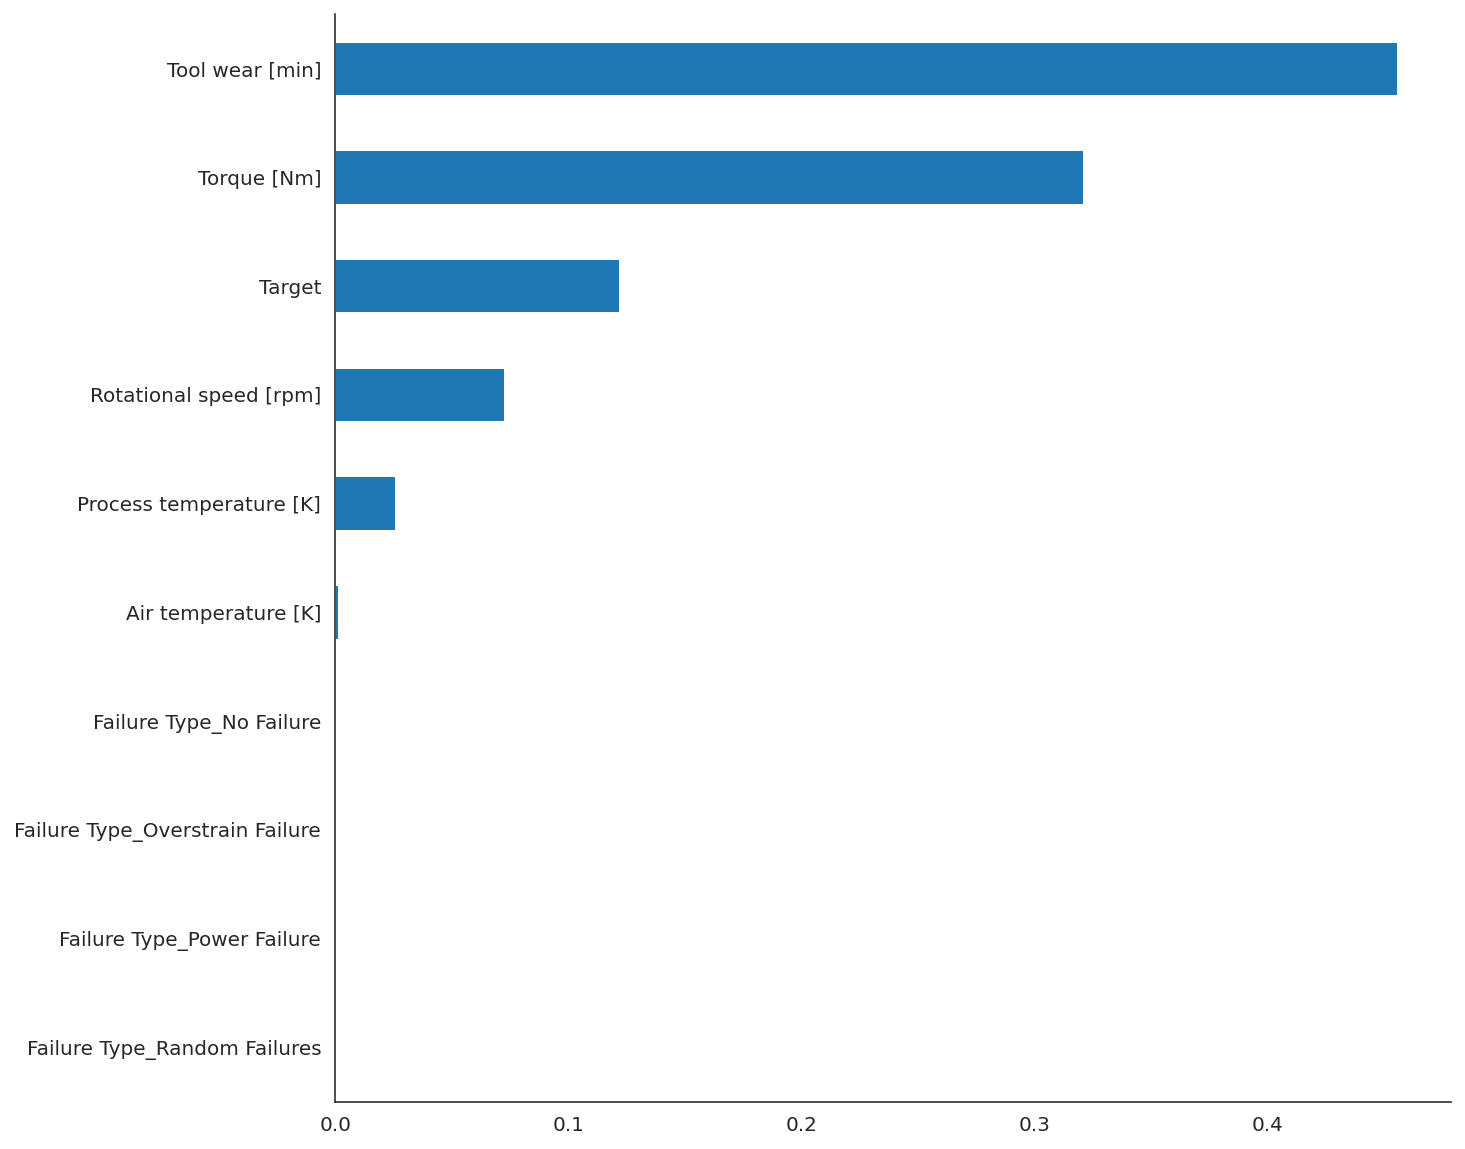

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 481 ms, sys: 41.2 ms, total: 522 ms
Wall time: 364 ms


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.90%
Recall: 99.90%
Precision: 99.90%
F1-Score: 99.90%
ROC AUC score: 88.87%
time to train: 0.96 s
time to predict: 0.00 s
total: 0.97 s


<a id='4_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Gradient Boosting Classifier</b>

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 963 ms, sys: 2.2 ms, total: 965 ms
Wall time: 969 ms


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.90%
Recall: 99.90%
Precision: 99.90%
F1-Score: 99.90%
ROC AUC score: 88.87%
time to train: 0.96 s
time to predict: 0.00 s
total: 0.97 s


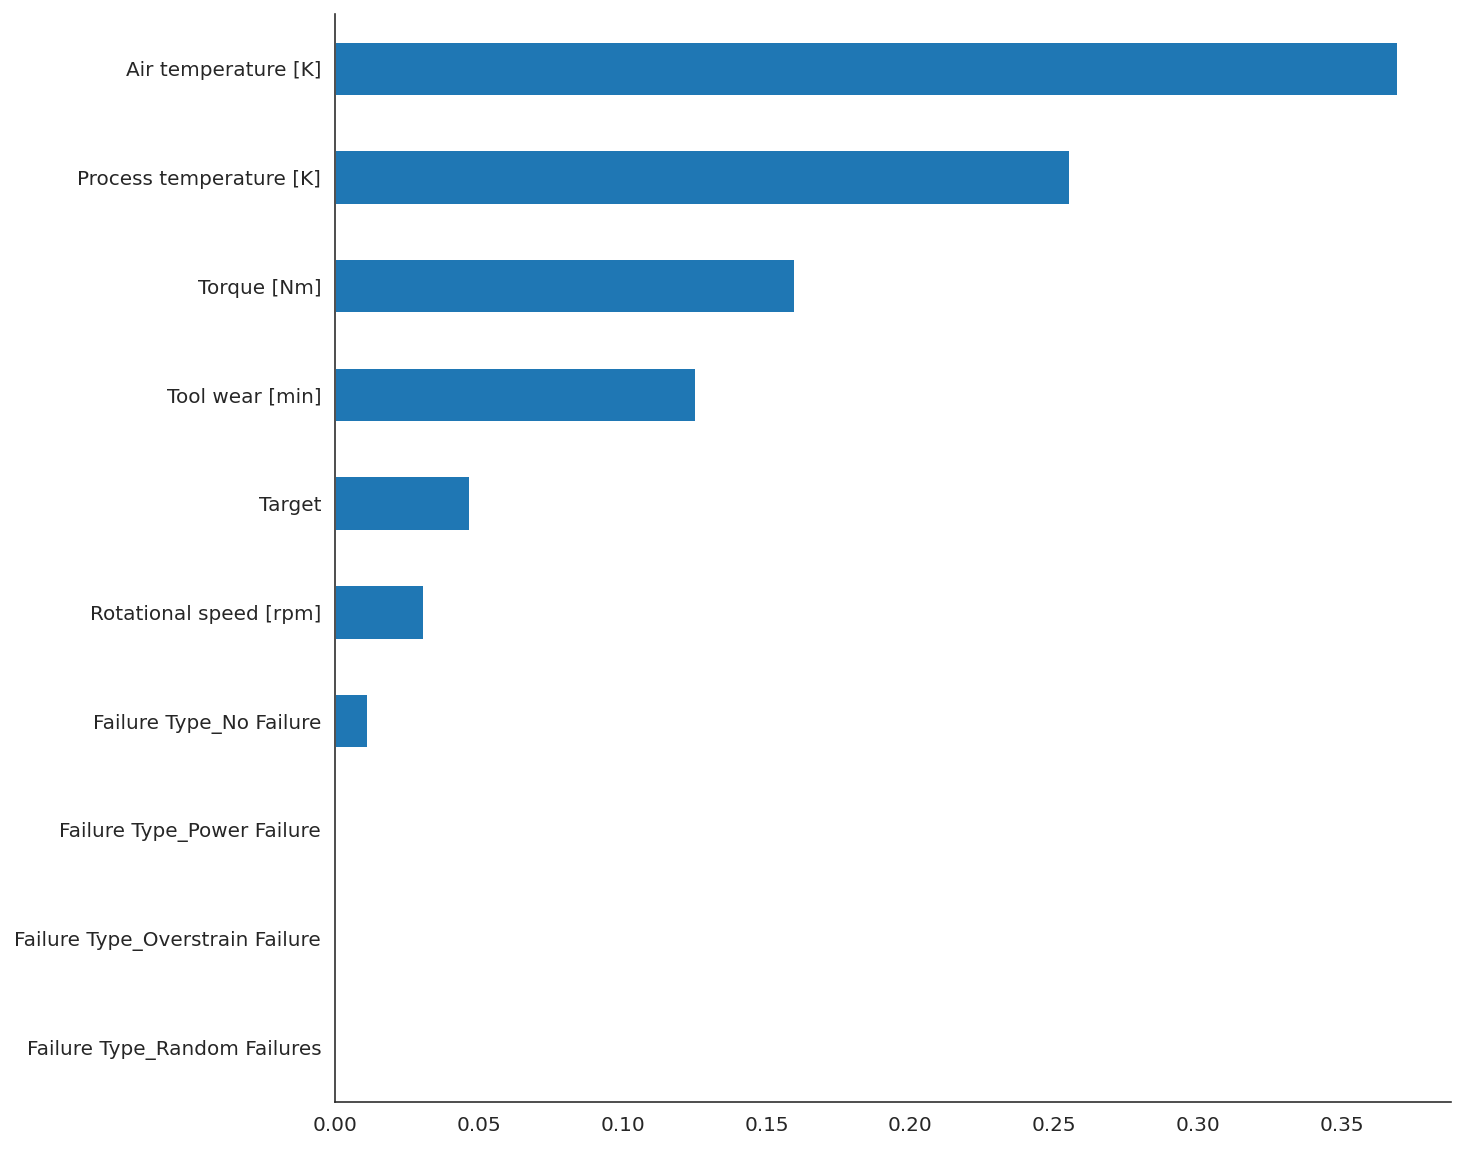

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_7'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP</b>

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100,100,),
                      activation='relu',
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 4.84 s, sys: 1.76 s, total: 6.6 s
Wall time: 3.52 s


In [ ]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Neural Network MLP'] = [accuracy, recall, precision, f1s, end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.85%
Recall: 99.85%
Precision: 99.85%
F1-Score: 99.84%
ROC AUC score: 99.98%
time to train: 3.50 s
time to predict: 0.00 s
total: 3.51 s


<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

## Sending email

In [ ]:
import smtplib, ssl

In [ ]:
mach = "Milling machine"

In [ ]:
port = 465  # For SSL
smtp_server = "smtp.gmail.com"
sender_email = "helly.dhamesha2020@vitstudent.ac.in"
receiver_email = "rahul.gandhi2020@vitstudent.ac.in"
password = "Helly#1704"
subject = "IOT predictive maintenance"
message = "Maintenance required for " + mach + "in 30 minutes"

In [ ]:
context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, subject, message)